In [10]:
import numpy as np
from matplotlib import pyplot as plt
import sys
sys.path.append('/home/janek/vsb/vyuka/mn/')
from kalman import *

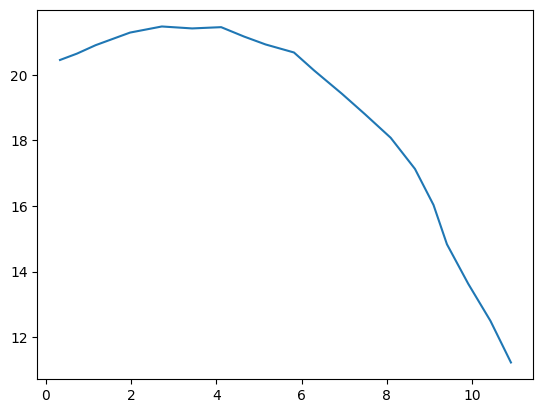

In [11]:
class Model1(Model):
    def Ak(self, k):
        return(np.array([[1, 0, self.D, 0], 
                         [0, 1, 0, self.D],
                         [0, 0, 1, 0],
                         [0, 0, 0, 1]]))
    def Bk(self, k):
        return(np.array([[0, 0],
                         [0, 0],
                         [self.D, 0],
                         [0, self.D]]))
    def Hk(self, k):
        return(np.array([[1, 0, 0, 0],
                         [0, 1, 0, 0]]))
    def Qk(self, k):
        return(0.01*np.eye(4))
    def Rk(self, k):
        return(0.001*np.eye(2))
    def Uk(self, k):
        return(np.array([0, -9.81]))

M1 = Model1()
M1.set_D(0.1)
S1 = System(M1, np.array([0, 20, 5, 5]))

S1.run(20)

plt.plot(S1.tracex[:, 0],S1.tracex[:, 1])


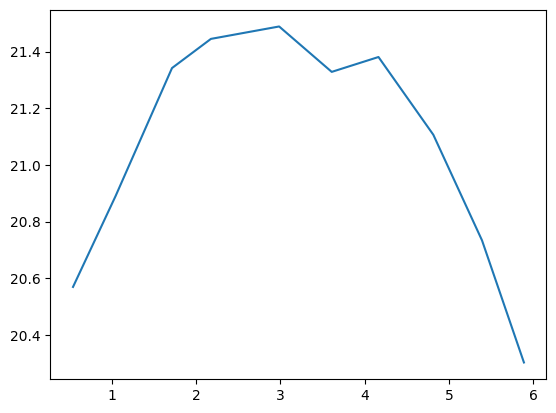

In [3]:
plt.plot(S1.tracex[0:10, 0],S1.tracex[0:10, 1])

In [4]:
S1.tracex.shape

(20, 4)

In [5]:
S1.tracey.shape

(20, 2)

In [6]:
S1.tracet

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ])

Text(0, 0.5, '$v_y$')

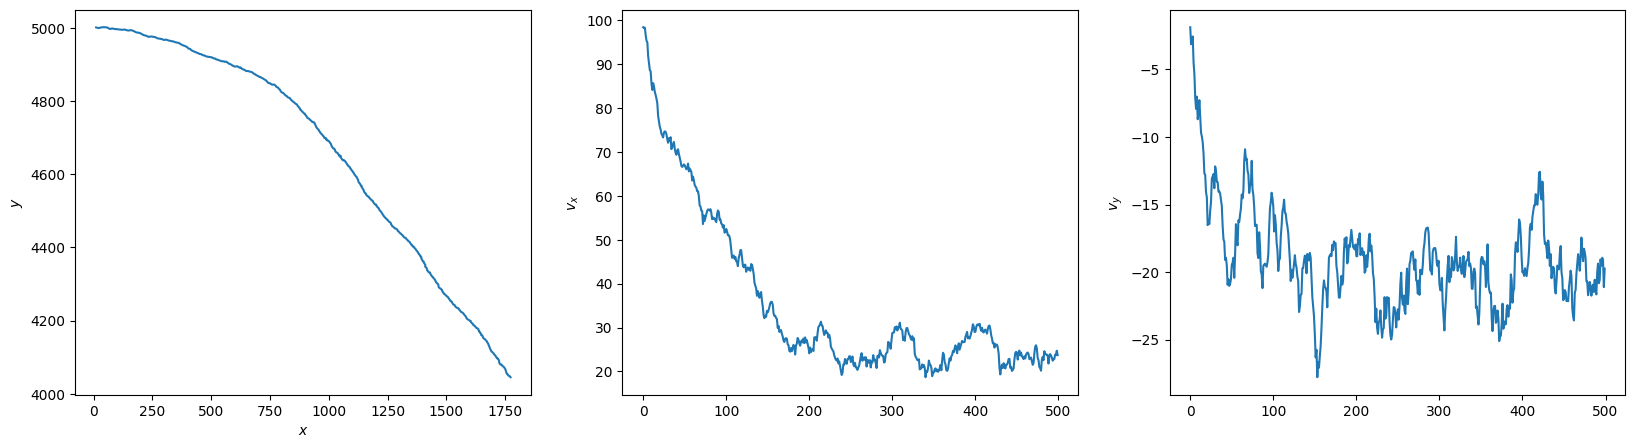

In [12]:
Kx = 10
Ky = 50
vl = 100
u = 20
h  = 5000
m = 100

class Model2(Model):
    def Ak(self, k):
        return(np.array([[1, 0, self.D, 0], 
                         [0, 1, 0, self.D],
                         [0, 0, 1-Kx/m*self.D, 0],
                         [0, 0, 0, 1-Ky/m*self.D]]))
    def Bk(self, k):
        return(np.array([[0, 0],
                         [0, 0],
                         [Kx/m*self.D, 0],
                         [0, self.D]]))
    def Hk(self, k):
        return(np.array([[1, 0, 0, 0],
                         [0, 1, 0, 0]]))
    def Qk(self, k):
        return(np.eye(4))
    def Rk(self, k):
        return(np.eye(2))
    def Uk(self, k):
        return(np.array([u, -9.81]))

M2 = Model2()
M2.set_D(0.1)
S2 = System(M2, np.array([0, h, vl, 0]))

S2.run(500)

plt.figure(figsize=(20, 5))

plt.subplot(131)
plt.plot(S2.tracex[:, 0], S2.tracex[:, 1])
plt.xlabel('$x$')
plt.ylabel('$y$')

plt.subplot(132)
plt.plot(S2.tracex[:, 2])
plt.ylabel('$v_x$')

plt.subplot(133)
plt.plot(S2.tracex[:, 3])
plt.ylabel('$v_y$')


### proměnlivá horizontální rychlost větru, měření polohy

In [ ]:
Kx = 5
Ky = 50
vl = 100
u = 20
h  = 5000
m = 100

class Model3(Model):
    def Ak(self, k):
        return(np.array([[1, 0, self.D, 0, 0], 
                         [0, 1, 0, self.D, 0],
                         [0, 0, 1-Kx/m*self.D, 0, Kx/m*self.D],
                         [0, 0, 0, 1-Ky/m*self.D, 0],
                         [0, 0, 0, 0, 1]]))
    def Bk(self, k):
        return(np.array([[0, 0],
                         [0, 0],
                         [self.D, 0],
                         [0, self.D],
                         [0, 0]]))
    def Hk(self, k):
        return(np.array([[1, 0, 0, 0, 0],
                         [0, 1, 0, 0, 0]]))
    def Qk(self, k):
        Q = np.zeros([5, 5])
        Q[4, 4] = 0.1
        return(Q)
    def Rk(self, k):
        return(1000**2*np.eye(2))
    def Uk(self, k):
        return(np.array([0, -9.81]))

M3 = Model3()
M3.set_D(0.5)
S3 = System(M3, np.array([0, h, vl, 0, u]))

In [ ]:
plt.figure(figsize=(20, 8))
for i in range(10):
    S3.reset()
    S3.run(500)
    plt.plot(S3.tracex[:, 0], S3.tracex[:, 1], 'b', alpha=0.5)
plt.xlabel('$x$')
plt.ylabel('$y$')

In [ ]:
S3.reset()
S3.run(500)

In [ ]:
plt.figure(figsize=(20, 10))

plt.subplot(221)
plt.plot(S3.tracex[:, 0], S3.tracex[:, 1])
plt.xlabel('$x$')
plt.ylabel('$y$')

plt.subplot(223)
plt.plot(S3.tracet, S3.tracex[:, 2])
plt.ylabel('$v_x$')
plt.xlabel('$t$')

plt.subplot(224)
plt.plot(S3.tracet, S3.tracex[:, 3])
plt.ylabel('$v_y$')
plt.xlabel('$t$')

plt.subplot(222)
plt.plot(S3.tracet, S3.tracex[:, 4])
plt.ylabel('$u$')
plt.xlabel('$t$')

In [ ]:
mu0 = np.array([1000, 3000, 0, 0, 0])
sigma0 = np.diag([1e6, 4e6, 4e4, 1e4, 1e4])
F3 = Filtr(S3, mu0, sigma0)

In [ ]:
F3.run()

In [ ]:
plt.figure(figsize=(20, 8))
plt.subplot(111)
plt.plot(S3.tracex[:, 0], S3.tracex[:, 1], 'b')
plt.plot(S3.tracey[:, 0], S3.tracey[:, 1], 'g.-', alpha=0.5)
plt.plot(F3.trace_mu[:, 0], F3.trace_mu[:, 1], 'r')
plt.xlabel('$x$')
plt.ylabel('$y$')
#plt.subplot(212)
#plt.plot(S3.tracex[:, 4], S3.tracex[:, 4], 'b')


### proměnlivá horizontální rychlost větru, měření zrychlení

In [8]:
Kx = 5
Ky = 50
vl = 100
u = 20
h  = 5000
m = 100

class Model4(Model):
    def Ak(self, k):
        return(np.array([[1, 0, self.D, 0, 0, 0, 0], 
                         [0, 1, 0, self.D, 0, 0, 0],
                         [0, 0, 1, 0, self.D, 0, 0],
                         [0, 0, 0, 1, 0, self.D, 0],
                         [0, 0, -Kx/m, 0, 0, 0, Kx/m],
                         [0, 0, 0, -Ky/m, 0, 0, 0],
                         [0, 0, 0, 0, 0, 0, 1]]))
    def Bk(self, k):
        return(np.array([[0, 0],
                         [0, 0],
                         [0, 0],
                         [0, 0],
                         [1, 0],
                         [0, 1],
                         [0, 0]]))
    def Hk(self, k):
        return(np.array([[0, 0, 0, 0, 1, 0, 0],
                         [0, 0, 0, 0, 0, 1, 0]]))
    def Qk(self, k):
        Q = np.zeros([7, 7])
        Q[6, 6] = 0.4**2
        return(Q)
    def Rk(self, k):
        return(0.4**2*np.eye(2))
    def Uk(self, k):
        return(np.array([0, -9.81]))

M4 = Model4()
M4.set_D(0.2)
S4 = System(M4, np.array([0, h, vl, 0, 0, -9.81, u]))

Text(0, 0.5, '$y$')

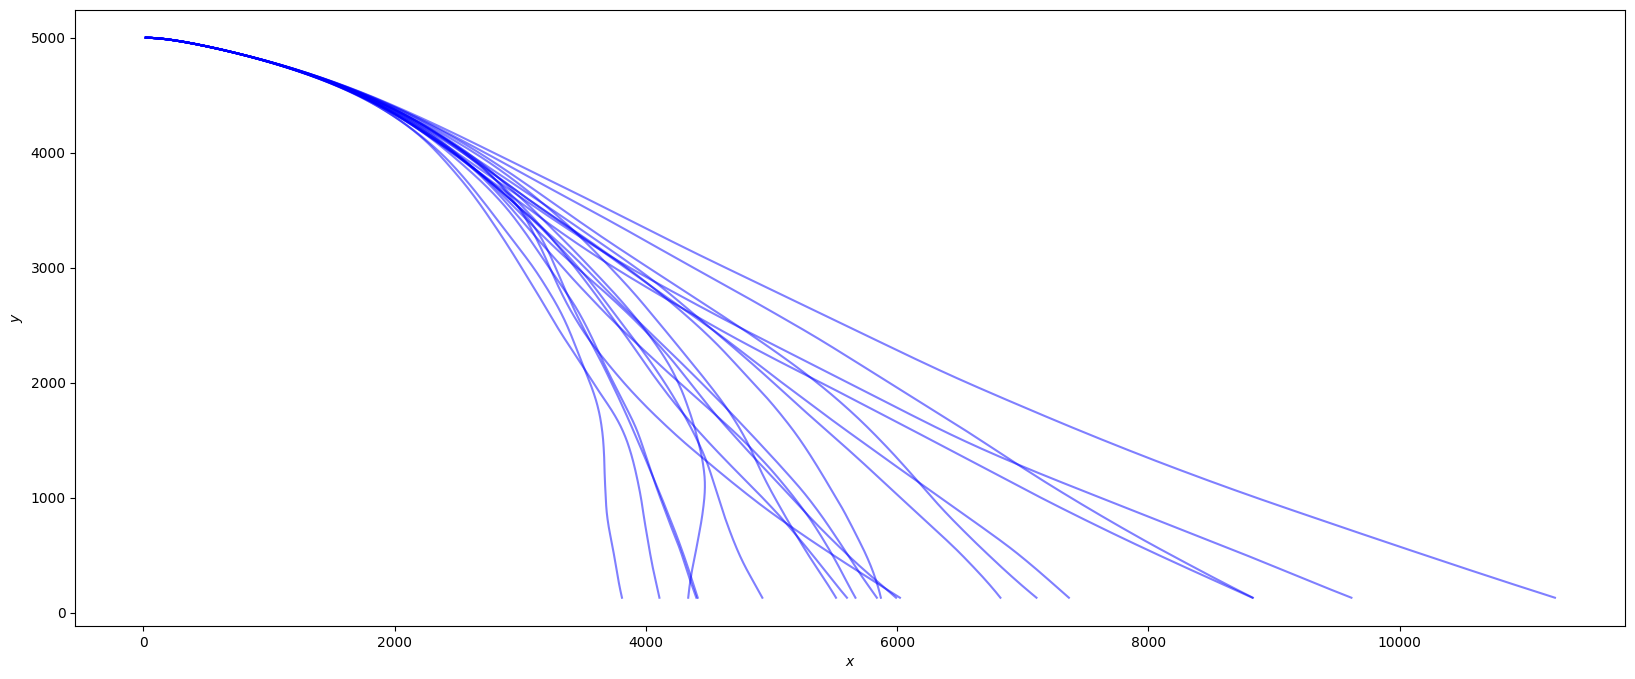

In [9]:
plt.figure(figsize=(20, 8))
for i in range(20):
    S4.reset()
    S4.run(1250)
    plt.plot(S4.tracex[:, 0], S4.tracex[:, 1], 'b', alpha=0.5)
plt.xlabel('$x$')
plt.ylabel('$y$')

In [ ]:
S4.reset()
S4.run(1250)

In [ ]:
plt.figure(figsize=(20, 10))

plt.subplot(321)
plt.plot(S4.tracex[:, 0], S4.tracex[:, 1])
plt.xlabel('$x$')
plt.ylabel('$y$')

plt.subplot(322)
plt.plot(S4.tracet, S4.tracex[:, 6])
plt.xlabel('$t$')
plt.ylabel('$u$')

plt.subplot(323)
plt.plot(S4.tracet, S4.tracex[:, 2])
plt.ylabel('$v_x$')
plt.xlabel('$t$')

plt.subplot(324)
plt.plot(S4.tracet, S4.tracex[:, 3])
plt.ylabel('$v_y$')
plt.xlabel('$t$')

plt.subplot(325)
plt.plot(S4.tracet, S4.tracex[:, 4])
plt.ylabel('$a_x$')
plt.xlabel('$t$')

plt.subplot(326)
plt.plot(S4.tracet, S4.tracex[:, 5])
plt.ylabel('$a_y$')
plt.xlabel('$t$')

In [ ]:
mu0 = np.array([0, 5000, vl, 0, 0, -9.81, u])
sigma0 = np.diag([1e1, 1e1, 1e1, 1e1, 0, 0, 0])
F4 = Filtr(S4, mu0, sigma0)

In [ ]:
F4.run()

In [ ]:
plt.figure(figsize=(20, 8))
plt.subplot(211)
plt.plot(S4.tracex[:, 0], S4.tracex[:, 1], 'b')
#plt.plot(S4.tracey[:, 0], S4.tracey[:, 1], 'g', alpha=0.1)
plt.plot(F4.trace_mu[:, 0], F4.trace_mu[:, 1], 'r')
plt.xlabel('$x$')
plt.ylabel('$y$')

plt.subplot(212)
plt.plot(S4.tracet, S4.tracex[:, 0], 'b')
plt.plot(S4.tracet, F4.trace_mu[:, 0], 'r')
f0s = F4.trace_sigma[:, 0, 0]**0.5
plt.plot(S4.tracet, F4.trace_mu[:, 0]-2*f0s, 'r--')
plt.plot(S4.tracet, F4.trace_mu[:, 0]+2*f0s, 'r--')
plt.xlabel('$t$')
plt.ylabel('$x$')